In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

import scipy as sp
from sklearn.linear_model import LinearRegression

pd.set_option("display.max_columns", 100)

import statsmodels.api as sm
import statsmodels.stats.api as sms


In [2]:
df = pd.read_csv('../Data/Ames_HousePrice.csv')

In [3]:
numeric = df.select_dtypes('number')
numeric.head(3)

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,909176150,856,126000,30,NaN,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,3,2010
1,2,905476230,1049,139500,120,42.0,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,2,2009
2,3,911128020,1001,124900,30,60.0,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,11,2007


In [4]:
Area = numeric[['LotArea','GrLivArea','1stFlrSF', '2ndFlrSF', 'LowQualFinSF', '3SsnPorch', 'BsmtFinSF1', 
                'BsmtFinSF2', 'WoodDeckSF','BsmtUnfSF', 'EnclosedPorch', 'GarageArea',
               'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'PoolArea',
               'ScreenPorch', 'TotalBsmtSF']]
Area.head(3)

,LotArea,GrLivArea,1stFlrSF,2ndFlrSF,LowQualFinSF,3SsnPorch,BsmtFinSF1,BsmtFinSF2,WoodDeckSF,BsmtUnfSF,EnclosedPorch,GarageArea,LotFrontage,MasVnrArea,OpenPorchSF,PoolArea,ScreenPorch,TotalBsmtSF
0,7890,856,856,0,0,0,238.0,0.0,0,618.0,0,399.0,NaN,0.0,0,0,166,856.0
1,4235,1049,1049,0,0,0,552.0,393.0,0,104.0,0,266.0,42.0,149.0,105,0,0,1049.0
2,6060,1001,1001,0,0,86,737.0,0.0,154,100.0,42,216.0,60.0,0.0,0,0,0,837.0


In [5]:
#Impute with 896 for the one missing TotalBsmtSF which is size of 1stFlrSF:
Area['TotalBsmtSF'] = Area['TotalBsmtSF'].replace(np.nan, 896)

/var/folders/kl/4xt5tydd0xb8yvwkgnx2mnc00000gn/T/ipykernel_21383/1729680531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Area['TotalBsmtSF'] = Area['TotalBsmtSF'].replace(np.nan, 896)


In [6]:
Area['GarageArea'] = Area['GarageArea'].replace(np.nan, 0)

/var/folders/kl/4xt5tydd0xb8yvwkgnx2mnc00000gn/T/ipykernel_21383/2728991719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Area['GarageArea'] = Area['GarageArea'].replace(np.nan, 0)


In [7]:
Area['MasVnrArea'] = Area['MasVnrArea'].replace(np.nan, 0)

/var/folders/kl/4xt5tydd0xb8yvwkgnx2mnc00000gn/T/ipykernel_21383/289676058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Area['MasVnrArea'] = Area['MasVnrArea'].replace(np.nan, 0)


In [8]:
# Group lots by configuration
grouped_lots = df.groupby(['LotConfig']).agg({
   'LotFrontage' : 'mean', 
})

#grouped_lots

LC = df[['LotConfig']]
Area['LC'] = LC

#replace np.nan with average for lot_config of that type
Area.loc[(Area['LotFrontage'].isna()) & (Area['LC'] == 'Corner'), 'LotFrontage'] = 84.46
Area.loc[(Area['LotFrontage'].isna()) & (Area['LC'] == 'CulDSac'), 'LotFrontage'] = 56.45        
Area.loc[(Area['LotFrontage'].isna()) & (Area['LC'] == 'FR2'), 'LotFrontage'] = 59.41        
Area.loc[(Area['LotFrontage'].isna()) & (Area['LC'] == 'FR3'), 'LotFrontage'] = 79.3        
Area.loc[(Area['LotFrontage'].isna()) & (Area['LC'] == 'Inside'), 'LotFrontage'] = 66.63

/var/folders/kl/4xt5tydd0xb8yvwkgnx2mnc00000gn/T/ipykernel_21383/2369724597.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Area['LC'] = LC
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [9]:
GBGVWLO = Area[['GrLivArea', 'TotalBsmtSF', 'GarageArea','MasVnrArea', 'WoodDeckSF','LotFrontage','OpenPorchSF']]
GBGVWLO.shape

(2580, 7)

In [10]:
GBGVWLO = GBGVWLO.assign(GBGVWLO = GBGVWLO['GrLivArea'] + GBGVWLO['TotalBsmtSF'] + 
                     GBGVWLO['GarageArea'] + GBGVWLO['MasVnrArea'] + GBGVWLO['WoodDeckSF'] +
                      GBGVWLO['LotFrontage'] + GBGVWLO['OpenPorchSF'])
GBGVWLO.head(3)

,GrLivArea,TotalBsmtSF,GarageArea,MasVnrArea,WoodDeckSF,LotFrontage,OpenPorchSF,GBGVWLO
0,856,856.0,399.0,0.0,0,84.46,0,2195.46
1,1049,1049.0,266.0,149.0,0,42.00,105,2660.00
2,1001,837.0,216.0,0.0,154,60.00,0,2268.00


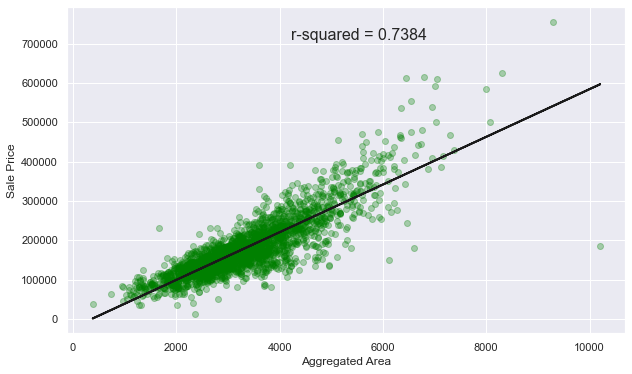

In [11]:
regressor = LinearRegression()

y = numeric['SalePrice'].values.reshape(-1,1)
x = GBGVWLO['GBGVWLO'].values.reshape(-1,1)
regressor.fit(x,y)
    
sns.set()
sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

plt.scatter(x,y, c='green', alpha=0.3)
plt.xlabel('Aggregated Area')
plt.ylabel('Sale Price')
plt.plot(x, regressor.predict(x), lw=2, c='k')
plt.annotate("r-squared = {:.4f}".format(regressor.score(x,y)), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=16)
plt.show()

In [12]:
y_pred = regressor.predict(x)

In [13]:
regressor.score(x,y)

0.7383916509498215

In [14]:
from sklearn.metrics import r2_score, mean_squared_error

In [15]:
r2_score(y, y_pred)

0.7383916509498215

In [16]:
mean_squared_error(y, y_pred)

1472196362.218024

In [17]:
from pyearth import Earth
import plotly.graph_objects as go
import plotly.express as px

In [18]:
mars = Earth(max_terms=10, max_degree=1)

y = numeric['SalePrice'].values.reshape(-1,1)
x = GBGVWLO['GBGVWLO'].values.reshape(-1,1)
mars.fit(x,y)
    
#sns.set()
#sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

#plt.scatter(x,y, c='green', alpha=0.3)
#plt.xlabel('Aggregated Area')
#plt.ylabel('Sale Price')
#plt.plot(x, mars.predict(x), lw=2, c='k')
#plt.annotate("r-squared = {:.4f}".format(mars.score(x,y)), xy=(0.4,0.9),
#                 xycoords = 'axes fraction', fontsize=16)
#plt.show()

Earth(max_degree=1, max_terms=10)

In [19]:
print("SLR")
print("SLR Intercept: ", regressor.intercept_)
print("Slope: ", regressor.coef_)
print()

print(mars.summary())

SLR
SLR Intercept:  [-21828.23154679]
Slope:  [[60.59825831]]

Earth Model
-------------------------------------
Basis Function  Pruned  Coefficient  
-------------------------------------
(Intercept)     No      448618       
h(x0-3853)      Yes     None         
h(3853-x0)      No      25.8245      
h(x0-7168)      No      -104.189     
h(7168-x0)      No      -75.1503     
h(x0-6220)      No      78.9916      
h(6220-x0)      Yes     None         
x0              Yes     None         
-------------------------------------
MSE: 1351869155.0112, GCV: 1363470865.5990, RSQ: 0.7598, GRSQ: 0.7579


In [20]:
print(mars.trace())

Forward Pass
---------------------------------------------------------------------------------
iter  parent  var  knot  mse                terms  gcv             rsq    grsq   
---------------------------------------------------------------------------------
0     -       -    -     5627482332.131722  1      5631847259.121  0.000  0.000  
1     0       0    1604  1400006936.387173  3      1406541382.290  0.751  0.750  
2     0       0    388   1368765688.730463  5      1380512404.989  0.757  0.755  
3     0       0    63    1350879169.939420  7      1367791420.567  0.760  0.757  
4     0       0    -1    1350092969.592345  8      1369665028.935  0.760  0.757  
---------------------------------------------------------------------------------
Stopping Condition 2: Improvement below threshold

Pruning Pass
--------------------------------------------------------------
iter  bf  terms  mse            gcv             rsq    grsq   
-----------------------------------------------------------

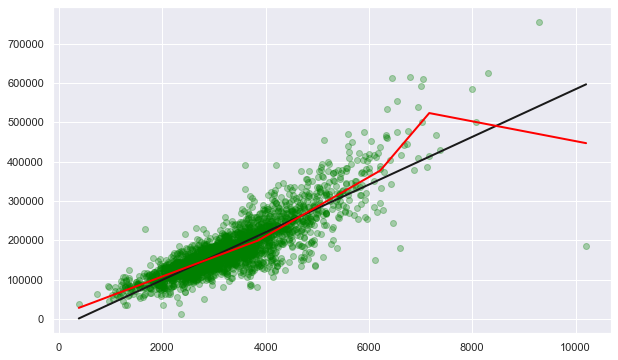

In [21]:
y = numeric['SalePrice'].values.reshape(-1,1)
x = GBGVWLO['GBGVWLO'].values.reshape(-1,1)

x_range = np.linspace(x.min(), x.max(), 20)
y_range = regressor.predict(x_range.reshape(-1,1))

x_mars = np.array([x.min(), 1000, 2000, 3000, 3853, 4000, 6220, 7168, x.max()])
y_mars = mars.predict(x_mars.reshape(-1,1))

sns.set()
sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

plt.scatter(x,y, c='green', alpha=0.3)
plt.plot(x_range, y_range, lw=2, c='k')
plt.plot(x_mars, y_mars, lw=2, c='red');
